In [1]:
from project.algorithms import ESMuPLambda

n = 31
y, x = 10, 30
max_trials, precision = 100000, 0.0001
mu, lam = 10, 100
search_space = (-15, y)

sim = ESMuPLambda(search_space, n, y, x, max_trials, precision, mu, lam)
sim.run()

print("Algorithm finished:")
print("\tGenerations:", sim.generations)
print("\tFitness:", sim.results[-1][0])


Algorithm finished:
	Generations: 486
	Fitness: 7.261698929078466


## Plot results

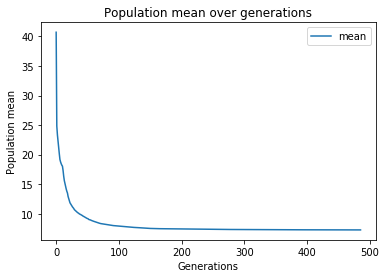

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure('Mean graph')
X_mean = range(len(sim.results))
Y_mean = [s[0] for s in sim.results]
plt.plot(X_mean, Y_mean, label='mean')
plt.legend()
plt.xlabel('Generations')
plt.ylabel('Population mean')
plt.title('Population mean over generations')
plt.show()

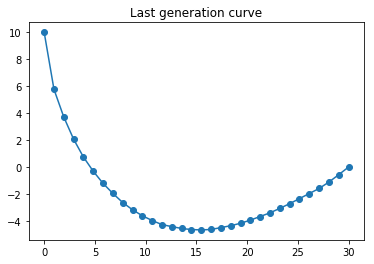

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure('Curves')
X_curve = np.linspace(0, sim.x, num=sim.n + 1)
Y_curve = [sim.y] + [g for g in sim.results[-1][1][0].chromosome] + [0]
plt.plot(X_curve, Y_curve, marker='o')
plt.title('Last generation curve')
plt.show()

## GIFs generation

1. Make sure to have the `output/curves` and `output/mean` folders in the project's root directory
2. Make sure to have `imagemagik` installed
3. Run the functions bellow
4. Chnage the `build_gifs.sh` permissions with `chmod +x build_gifs.sh`
5. Execute the bash script with `./build_gifs.sh`
6. Enjoy ;)

**Note:** You may want to delete the content of `output/curves` and `output/mean` after the script execution

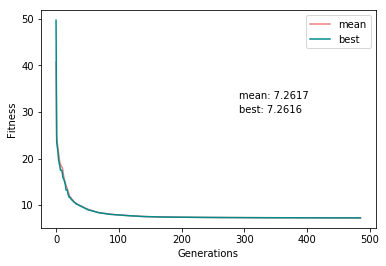

In [5]:
import matplotlib.pyplot as plt
import numpy as np


def create_fitness_gif(output_dir, frames=100):
    fig, ax = plt.subplots()
    step_size = int(sim.generations / frames)
    rem = sim.generations % frames
    data_points = step_size
    c = 1
    digits = int(np.log10(frames)) + 1

    while data_points < sim.generations + rem:
        ax.clear()
        ax.set_xlabel('Generations')
        ax.set_ylabel('Fitness')
        population = sim.results[:data_points]
        X = list(range(1, data_points + 1))
        Y_mean = [r[0] for r in population]
        Y_best = [r[1][0].fitness for r in population]
        ax.plot(Y_mean, label='mean', color='lightcoral')
        ax.plot(Y_best, label='best', color='darkcyan')
        ax.legend()
        ax.text(0.6*data_points, 0.6*max(Y_best), 'best: {:.4f}'.format(Y_best[-1]))
        ax.text(0.6*data_points, 0.6*max(Y_best) + 3, 'mean: {:.4f}'.format(Y_mean[-1]))
        plt.savefig('{}/{}.frame.jpg'.format(output_dir, str(c).zfill(digits)))
        data_points += step_size
        c += 1

create_fitness_gif('output/mean', frames=80)

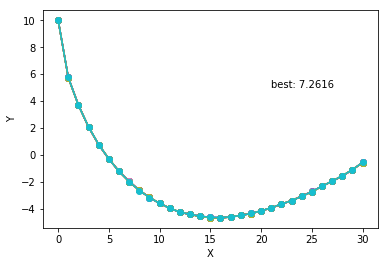

In [6]:
import matplotlib.pyplot as plt
import math


def create_population_gif(output_dir, frames=90):
    fig, ax = plt.subplots()
    digits = int(math.log10(len(sim.results))) + 1
    c = 1
    for g in [r[1] for r in sim.results]:
        ax.clear()
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        for curve in g:
            ax.plot([sim.y] + curve.chromosome, marker='o')
        ax.text(sim.x * 0.7, sim.y * 0.5, 'best: {:.4f}'.format(g[0].fitness))
        plt.savefig('{}/{}.frame.jpg'.format(output_dir, str(c).zfill(digits)))
        c += 1
            
create_population_gif('output/curves', )